In [1]:
!pip install transformers
!pip install pandas torch
!pip install datasets
!pip install hf_transfer

In [2]:
# load in dataset
from datasets import load_dataset
import pandas

# # import BLIMP
# nyu_mll_blimp = load_dataset("nyu-mll/blimp", "adjunct_island")
# df_BLIMP = pandas.DataFrame(nyu_mll_blimp['train'])

# # store
# df_BLIMP.to_csv("/workspace/tda_vs_linguistics/data/nyu_mll_blimp.csv", index=False)

In [3]:
# import winograd
nyu_winograd = load_dataset("allenai/winogrande", "winogrande_xl", split="train")

def make_sentence_pairs(dataset):
    sentence = dataset["sentence"]
    word1 = dataset["option1"]
    word2 = dataset["option2"]
    answer = dataset["answer"]

    sentence1 = sentence.replace("_", word1)
    sentence2 = sentence.replace("_", word2)
    label = 1 if answer == word1 else 2
    
    return {
        "sentence1": sentence1,
        "sentence2": sentence2,
        "label": label
    }

# map function to dataset
alt_nyu_winograd = nyu_winograd.map(make_sentence_pairs)
df_winograd = pandas.DataFrame(alt_nyu_winograd)[["sentence1", "sentence2", "label"]]

# store
df_winograd.to_csv("/workspace/tda_vs_linguistics/data/nyu_winograd_wsc.csv", index=False)

In [4]:
#the dataset is sentence pairs so call the set of first senetences like sentence_1 , second set sentences_2 both of these are lists
# sentence_1_array=df_BLIMP["sentence_good"]
# sentence_2_array=df_BLIMP["sentence_bad"]
sentence_1_array=df_winograd["sentence1"][:100]
sentence_2_array=df_winograd["sentence2"][:100]

In [5]:
!pip install accelerate

In [6]:
model_id = "workspace/Meta-Llama-3-8B-Instruct"

#to compute the embeddings first we need to get the tokens for the cleaned strings 
from huggingface_hub import login
from transformers import AutoTokenizer


from transformers import AutoModelForCausalLM, AutoTokenizer

models = ["Qwen/Qwen2.5-7B-Instruct-1M", "Qwen/Qwen3-8B"] 

model_name = models[0]

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_name)

#tokenizer=AutoTokenizer.from_pretrained(model_id)

#pre_processed returns a list of list of strings 
#tokenizer can only take string or a list of strings 
# cleaned_text_1=pre_processed(sentence_array_1)
# cleaned_text_2=pre_processed(sentence_array_2)
cleaned_text_into_encoder_1=["".join(tokens) for tokens in sentence_1_array]
cleaned_text_into_encoder_2=["".join(tokens) for tokens in sentence_2_array]

encodings_1 = tokenizer(text = cleaned_text_into_encoder_1, padding=True, truncation=True, return_tensors="pt").to(model.device)
encodings_2 = tokenizer(text = cleaned_text_into_encoder_2, padding=True, truncation=True, return_tensors="pt").to(model.device)

#encodings=tokenizer(text=cleaned_text_into_encoder,padding=True,truncation=True)
#input ids are the integer representation of the tokens , the embeddings are the vectors that correspond to these integers in the lookup table 
#attention mask - reprsents paddings?
print(encodings_1.keys())
print(encodings_2.keys())

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

KeysView({'input_ids': tensor([[ 79168,  73671,    311,  ..., 151643, 151643, 151643],
        [ 79168,  73671,    311,  ..., 151643, 151643, 151643],
        [  1519,   2581,   4041,  ..., 151643, 151643, 151643],
        ...,
        [   641,    279,    326,  ...,   2487,     13, 151643],
        [ 53083,  21475,    594,  ..., 151643, 151643, 151643],
        [ 53083,  21475,    594,  ..., 151643, 151643, 151643]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0')})
KeysView({'input_ids': tensor([[ 79168,  73671,    311,  ..., 151643, 151643, 151643],
        [ 79168,  73671,    311,  ..., 151643, 151643, 151643],
        [  1519,   2581,   4041,  ..., 151643, 151643, 151643],
        ...,
        [   641,    279,    326,  ...,    862,   2487,     13],
       

In [7]:
# #computing embeddings 
# input_ids=encodings["input_ids"]
# attention_mask=encodings["attention_mask"]
# from transformers import AutoModel
# import torch 
# model=Automodel.from_pre_trained("google/gemma-7b")
# model.eval()
# device="cuda" if torch.cuda.is_available() else "cpu"
# model.to(device)
# with torch.no_grad(): 
#     outputs = model(input_ids=input_ids.to(device),
#                     attention_mask=attention_mask.to(device))
#     token_embeddings = outputs.last_hidden_state

In [8]:
!pip install numpy networkx IPython
!pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [9]:
!pip install ripser persim teaspoon
# if issues w ripser do "sudo apt remove python3-pyparsing" in terminal

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached ripser-0.6.12-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
  Using cached persim-0.3.8-py3-none-any.whl.metadata (3.8 kB)
  Using cached teaspoon-1.5.29-py3-none-any.whl.metadata (6.5 kB)
  Using cached cython-3.1.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (4.0 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached Deprecated-1.2.18-py2.py3-none-any.whl.metadata (5.7 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached pot-0.9.6.post1-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (40 kB)
  Using cached pyentrp-2.0.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached gudhi-3.11.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached numba-0.62.1-cp312-cp312-manylinux2014_x86_64.manylinux_

In [10]:
# imports!
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
from IPython.display import Video

import ripser
import persim
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw

from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

In [11]:
!pip install scikit-learn

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


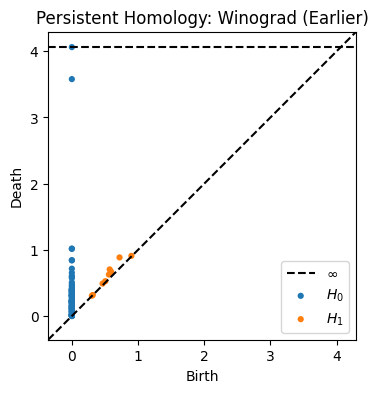

In [12]:
# make tokens into tensor
# D = np.array(encodings_1["input_ids"], dtype=float)
D = encodings_1["input_ids"].detach().cpu().numpy().astype(float)

# standardize tokens
scaler = StandardScaler()
D_scaled = scaler.fit_transform(D)

# initialize PCA w/ 2 components
pca = PCA(n_components=2)

# fit + transform PCA
D_pca = pca.fit_transform(D_scaled)

# make diagram w ripser
diagrams = ripser.ripser(D_pca, distance_matrix=False, maxdim=1)['dgms']

# plot diagrams
plt.figure(figsize=(8, 4))
persim.plot_diagrams(diagrams, show=False, title="Persistent Homology: Winograd (Earlier)")# BLIMP (sentence_good)")
plt.savefig("/workspace/tda_vs_linguistics/data/earlier_PH.pdf", format="pdf", bbox_inches="tight")
# plt.savefig("/workspace/tda_vs_linguistics/data/sentence_good_PH.pdf", format="pdf", bbox_inches="tight")
plt.show()

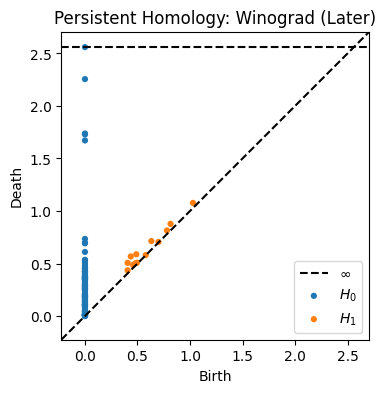

In [13]:
# make tokens into tensor
# D = np.array(encodings_1["input_ids"], dtype=float)
D = encodings_2["input_ids"].detach().cpu().numpy().astype(float)

# standardize tokens
scaler = StandardScaler()
D_scaled = scaler.fit_transform(D)

# initialize PCA w/ 2 components
pca = PCA(n_components=2)

# fit + transform PCA
D_pca = pca.fit_transform(D_scaled)

# make diagram w ripser
diagrams = ripser.ripser(D_pca, distance_matrix=False, maxdim=1)['dgms']

# plot diagrams
plt.figure(figsize=(8, 4))
persim.plot_diagrams(diagrams, show=False, title="Persistent Homology: Winograd (Later)")# BLIMP (sentence_bad)")
plt.savefig("/workspace/tda_vs_linguistics/data/later_PH.pdf", format="pdf", bbox_inches="tight")
# plt.savefig("/workspace/tda_vs_linguistics/data/sentence_bad_PH.pdf", format="pdf", bbox_inches="tight")
plt.show()